<a href="https://colab.research.google.com/github/izzul112/Submission-Image_Classification/blob/master/Submission_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# melakukan ekstraksi pada file zip
import zipfile, os
local_zip = '/content/gdrive/My Drive/dataset/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp'
train_dir = os.path.join(base_dir, 'train')

In [4]:
os.listdir('/tmp/train')

['DRUSEN', 'NORMAL', 'DME', 'CNV']

In [5]:
# membuat direktori CNV pada direktori data training
train_CNV_dir = os.path.join(train_dir, 'CNV')

# membuat direktori DME pada direktori data training
train_DME_dir = os.path.join(train_dir, 'DME')

# membuat direktori DRUSEN pada direktori data training
train_DRUSEN_dir = os.path.join(train_dir, 'DRUSEN')

# membuat direktori NORMAL pada direktori data training
train_NORMAL_dir = os.path.join(train_dir, 'NORMAL')

# membuat direktori CNV pada direktori data validasi
validation_CNV_dir = os.path.join(train_dir, 'CNV')

# membuat direktori DME pada direktori data validasi
validation_DME_dir = os.path.join(train_dir, 'DME')

# membuat direktori DRUSEN pada direktori data validasi
validation_DRUSEN_dir = os.path.join(train_dir, 'DRUSEN')

# membuat direktori NORMAL pada direktori data validasi
validation_NORMAL_dir = os.path.join(train_dir, 'NORMAL')

In [6]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    horizontal_flip=True,
                    validation_split=0.2)

val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.2)

In [7]:
img_shape = (224, 224, 3)

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=img_shape[:2], 
        batch_size=100,
        class_mode="categorical",
        subset='training'
        )

validation_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=img_shape[:2], 
        batch_size=10,
        class_mode='categorical',
        subset='validation'
        )

Found 66788 images belonging to 4 classes.
Found 16696 images belonging to 4 classes.


In [8]:
# Callback

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.92 and logs.get('val_accuracy')>=0.92):
      print("\nReached 92% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [9]:
ResNet = tf.keras.applications.ResNet50V2(input_shape=img_shape, include_top=False)

94674944/94668760 [==============================] - 3s 0us/step


In [10]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    ResNet,
    tf.keras.layers.Conv2D(16, (4,4), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.layers[0].trainable = False

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
conv2d (Conv2D)              (None, 4, 4, 16)          524304    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
Total params: 24,090,212
Trainable params: 525,412
Non-trainable params: 23,564,800
______________________________________

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(),
              metrics=['accuracy'])

In [13]:
history = model.fit(
            train_generator, 
            steps_per_epoch=50, 
            epochs=200, 
            validation_data=validation_generator, 
            validation_steps=10, 
            verbose=1, callbacks=[callbacks])

Epoch 1/200
50/50 [==============================] - 38s 758ms/step - loss: 1.7850 - accuracy: 0.4900 - val_loss: 1.3911 - val_accuracy: 0.2700
Epoch 2/200
50/50 [==============================] - 35s 708ms/step - loss: 1.0085 - accuracy: 0.6086 - val_loss: 1.3163 - val_accuracy: 0.6300
Epoch 3/200
50/50 [==============================] - 35s 695ms/step - loss: 0.8301 - accuracy: 0.6890 - val_loss: 0.7066 - val_accuracy: 0.6400
Epoch 4/200
50/50 [==============================] - 34s 690ms/step - loss: 0.7070 - accuracy: 0.7220 - val_loss: 0.9874 - val_accuracy: 0.6800
Epoch 5/200
50/50 [==============================] - 34s 675ms/step - loss: 0.6219 - accuracy: 0.7514 - val_loss: 0.6245 - val_accuracy: 0.7900
Epoch 6/200
50/50 [==============================] - 33s 665ms/step - loss: 0.6148 - accuracy: 0.7824 - val_loss: 0.5276 - val_accuracy: 0.8000
Epoch 7/200
50/50 [==============================] - 33s 662ms/step - loss: 0.5438 - accuracy: 0.8126 - val_loss: 0.8407 - val_accuracy:

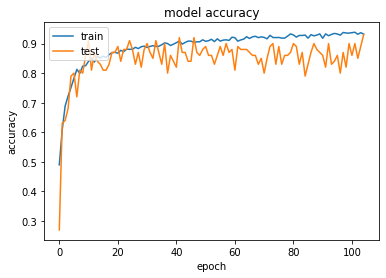

In [14]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

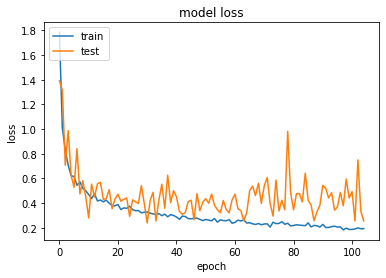

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpeuzajqc4/assets


In [17]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)